# split hu-specific msa30-way results into dels, ins, subs
20221219 

Sarah Fong

Input
- output from msa30-way human gap, insertion, substitution script

Method
- format tabluar data w/ column names

- remove duplicates

- split into separate gaps, insertions, and deletions files

- plot some basic stats (counts of chr number, n species, maf block size)

Return
- formatted gaps/insertion/sub file
- separate gaps, insertion, sub files
- basic count plots

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, sys
import pandas as pd
import seaborn as sns
sys.path.append("/wynton/home/ahituv/fongsl/tools/py_")
import config_readwrite as crw

config_tag = "config.ini"
config, configfile_name = crw.read_config(os.path.join(os.getcwd(), config_tag))

PATH = config["hu-specific"]["path"]
FILES = config["hu-specific"]["files"]
ALL = config["hu-specific"]["file"]

# concatenate files

In [2]:
if os.path.exists(ALL) is False:
    
    # concatenate all the files together
    cmd = f"cat {FILES} > {ALL}"
    os.system(cmd)
    
    # zip the original files
    cmd = f"gzip {FILES}"
    os.system(cmd)
else:
    print("concated files already")

concated files already


# format data

In [3]:
# test whether columns have names
df_cols = pd.read_csv(ALL, sep='\t', nrows=1).columns

# if not, name columns
if "#chr" not in df_cols:
    
    # open the file
    df = pd.read_csv(ALL, sep='\t', header=None, low_memory=False)
    print("before duplicate drop", df.shape)
    
    # name the columns
    cols = [
        "#chr", "start", "end",
        "nspecies_block", "maf_block_start", 
        "maf_block_len", "species", "mutation", "nbases"
           ]
    df.columns = cols
    
    # drop duplicates()
    df = df.drop_duplicates()

    print("after duplicate drop", df.shape)
    
    # re-wrte the file w/ column names, unique rows only
    df.to_csv(ALL, sep='\t', index=False)
    df['id'] = df["#chr"] + ":" + df['start'].map(str) + "-" + df["end"].map(str)

# if named, open dataframe w column names
else:
    df = pd.read_csv(ALL, sep='\t', low_memory=False)

print(df.shape)
df.head()

(15109423, 10)


,#chr,start,end,nspecies_block,maf_block_start,maf_block_len,species,mutation,nbases,id
0,chr10,10829,10830,6,10816,67,"hg38,panPan2,gorGor5,nomLeu3,colAng1,tarSyr2",SUB,1,chr10:10829-10830
1,chr10,10832,10833,6,10816,67,"hg38,panPan2,gorGor5,nomLeu3,colAng1,tarSyr2",SUB,1,chr10:10832-10833
2,chr10,10850,10851,6,10816,67,"hg38,panPan2,gorGor5,nomLeu3,colAng1,tarSyr2",SUB,1,chr10:10850-10851
3,chr10,10861,10862,6,10816,67,"hg38,panPan2,gorGor5,nomLeu3,colAng1,tarSyr2",SUB,1,chr10:10861-10862
4,chr10,10868,10869,6,10816,67,"hg38,panPan2,gorGor5,nomLeu3,colAng1,tarSyr2",SUB,1,chr10:10868-10869


# write files based on mutation type

In [7]:
# get unique mutation labels
mutations = df["mutation"].unique()

for m in mutations:
    
    
    # create file for mutation specific file
    out = os.path.join(PATH, f"{m}.hu-specific.bed")

    # write the mutation-specific file
    #if os.path.exists(out) is False:
    test=df.loc[df["mutation"]==m].drop_duplicates()
    print(m, test.shape)
    test.to_csv(out, sep='\t', index=False)
    
    # write to config
    config['hu-specific'][m]=out
    print(out)

SUB (13672306, 10)
/wynton/home/ahituv/fongsl/dna/hg38/multiz30way/SUB.hu-specific.bed
DEL (790141, 10)
/wynton/home/ahituv/fongsl/dna/hg38/multiz30way/DEL.hu-specific.bed
INS (646976, 10)
/wynton/home/ahituv/fongsl/dna/hg38/multiz30way/INS.hu-specific.bed


## write results path and separated mutation .bed files to config

In [5]:
RE="/wynton/home/ahituv/fongsl/microexons/results/hu-specific_msa_30way"
config["hu-specific"]["results"]=RE
crw.write_config(config, configfile_name)

# evaluate features 

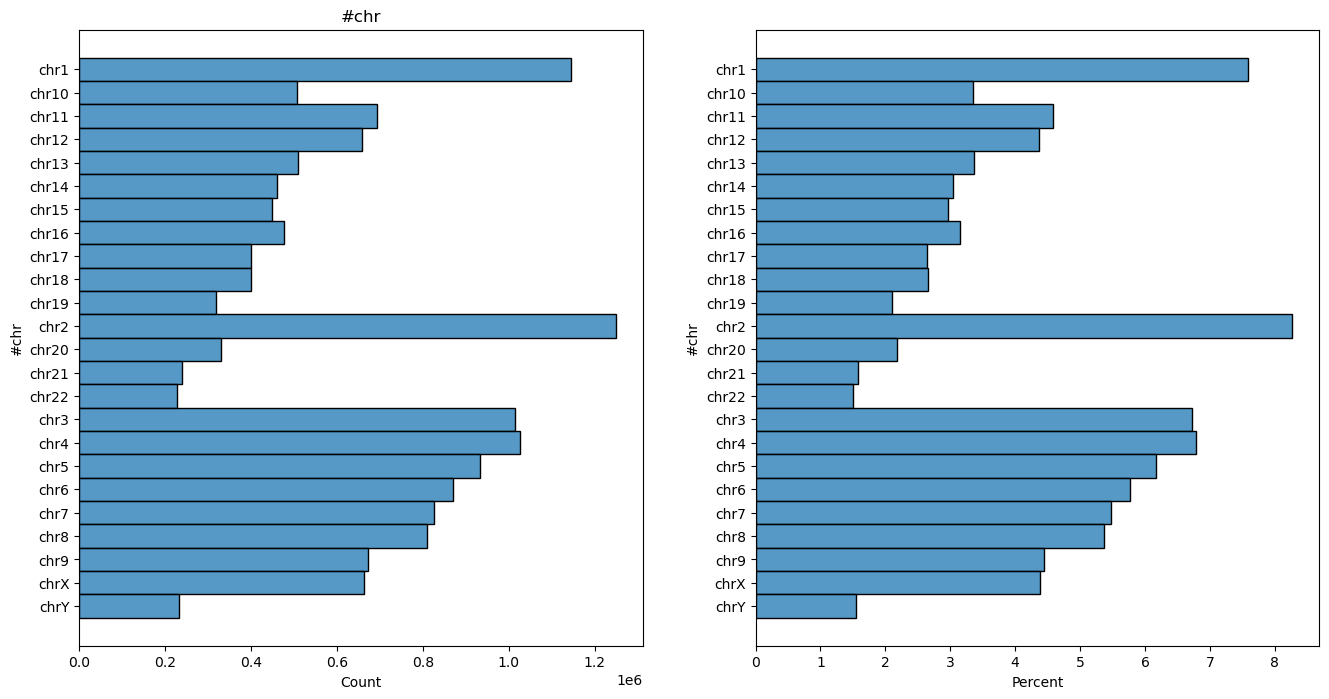

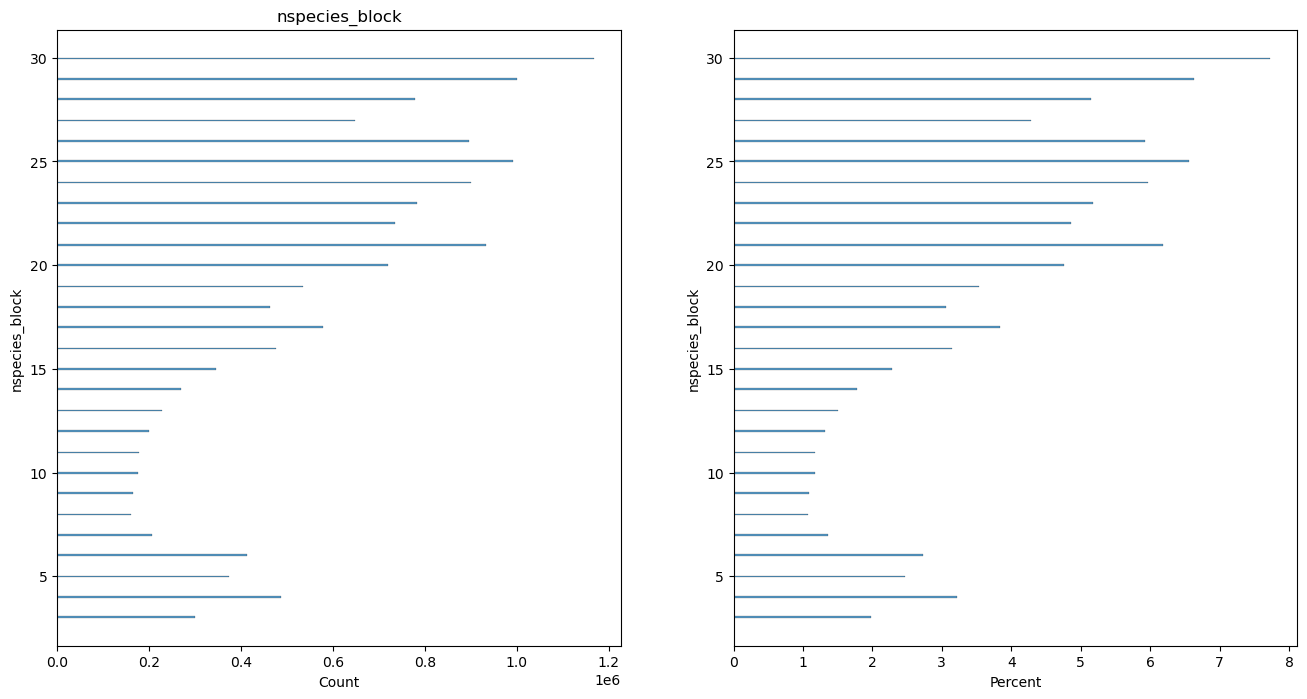

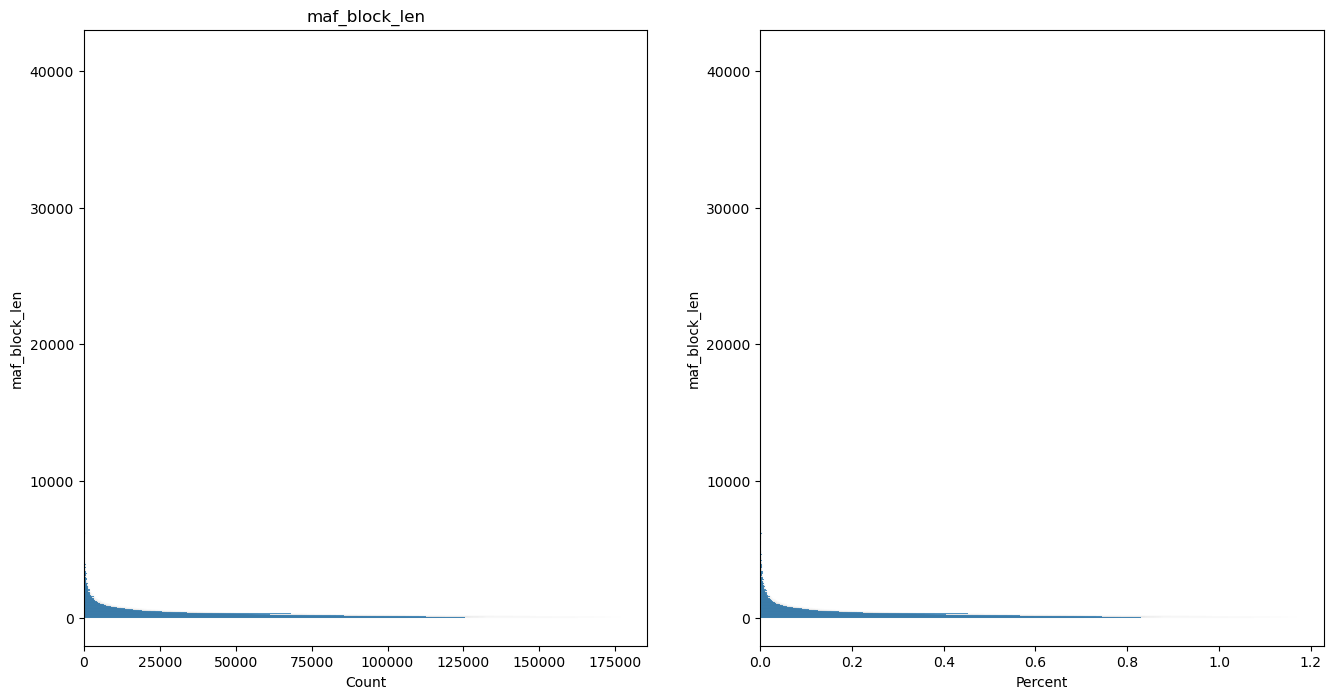

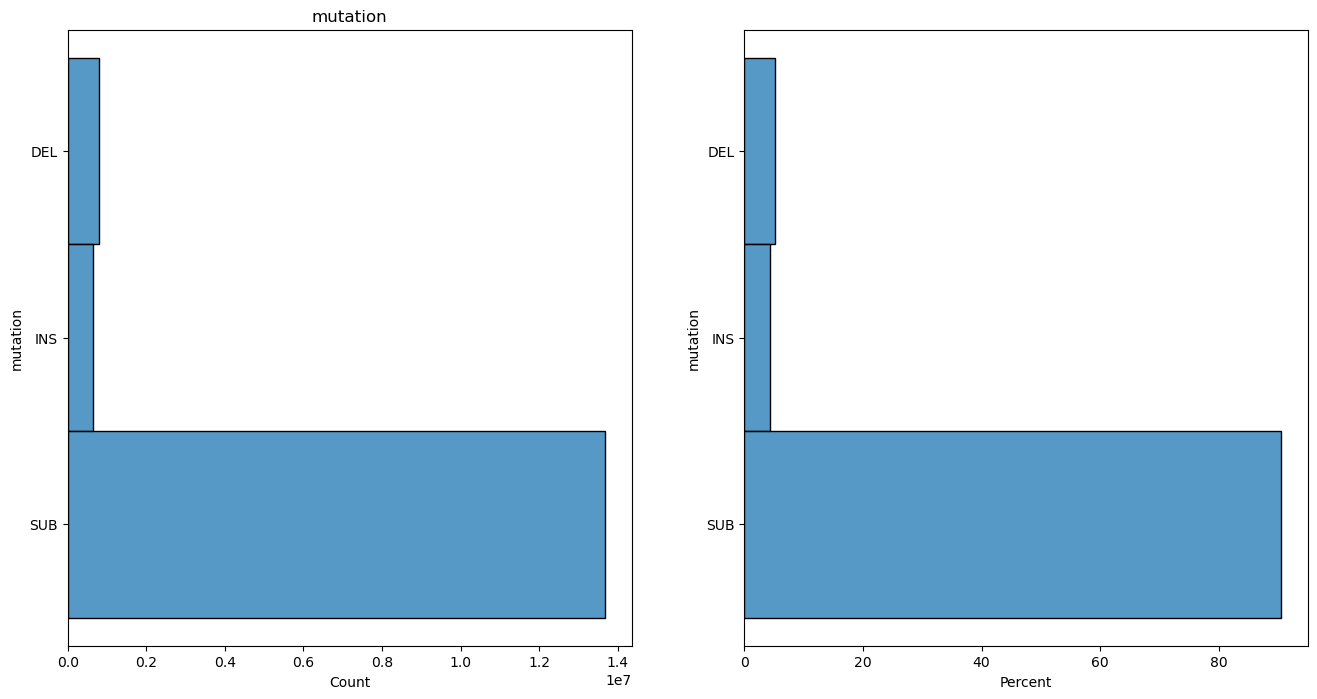

In [9]:
features = ["#chr", "nspecies_block", "maf_block_len", "mutation"]

for f in features:
    fig, (ax, ax2) = plt.subplots(ncols = 2, figsize=(16,8))
    
    # plot count
    sns.histplot(data=df.sort_values(by=f), y=f, ax=ax)
    ax.set(title=f)
    
    
    # plot frequency
    sns.histplot(data=df.sort_values(by=f), y=f, stat="percent", ax=ax2)

    # save plot
    out = os.path.join(RE, f'{f}-hist.pdf')
    plt.savefig(out, bbox_inches="tight")

In [10]:
df.head()

,#chr,start,end,nspecies_block,maf_block_start,maf_block_len,species,mutation,nbases,id
0,chr10,10829,10830,6,10816,67,"hg38,panPan2,gorGor5,nomLeu3,colAng1,tarSyr2",SUB,1,chr10:10829-10830
1,chr10,10832,10833,6,10816,67,"hg38,panPan2,gorGor5,nomLeu3,colAng1,tarSyr2",SUB,1,chr10:10832-10833
2,chr10,10850,10851,6,10816,67,"hg38,panPan2,gorGor5,nomLeu3,colAng1,tarSyr2",SUB,1,chr10:10850-10851
3,chr10,10861,10862,6,10816,67,"hg38,panPan2,gorGor5,nomLeu3,colAng1,tarSyr2",SUB,1,chr10:10861-10862
4,chr10,10868,10869,6,10816,67,"hg38,panPan2,gorGor5,nomLeu3,colAng1,tarSyr2",SUB,1,chr10:10868-10869


In [13]:
df[features[1:]].describe()

,nspecies_block,maf_block_len
count,1.510942e+07,1.510942e+07
mean,2.029623e+01,5.170822e+02
std,7.734884e+00,1.035412e+03
min,3.000000e+00,1.000000e+00
25%,1.600000e+01,9.300000e+01
50%,2.200000e+01,2.200000e+02
75%,2.600000e+01,4.980000e+02
max,3.000000e+01,4.095600e+04
